## Name: Aayam Raj Shakya

# CSE 3683 Lab 3

The assignment for this notebook is to use machine learning algorithms to perform housing price prediction. This notebook is divided into 4 parts:

*   Part A: Data Loading and Visualization
*   Part B: Linear Regression
*   Part C: Classification: K-Nearest Neighbor

References:
*   https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing
*   https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Part A: Data Loading and Visualization

In this section, we will load the California housing price dataset from the 1990 U.S. census in the scikit-learn library. The dataset contains eight features for each sample: median income, median house age, average number of rooms, average number of bedrooms, block group population, average occupancy, latitude, and longitude, which were obtained for each of n = 20640 block groups. The output variable of interest is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

* Data Set Characteristics:

    * Number of Instances: 20640
    * Number of Attributes: 8
    * Target: Median house value
    * Attribute Information
        * MedInc: median income in block group
        * HouseAge: median house age in block group
        * AveRooms: average number of rooms per household
        * AveBedrms: average number of bedrooms per household
        * Population: block group population
        * AveOccup: average number of household members
        * Latitude: block group latitude
        * Longitude: block group longitude

Source URL: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# load the California housing dataset from the scikit learn library
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
features = dataset.data
labels = dataset.target

print('Shape of features array is', features.shape)
print('Shape of labels array is', labels.shape)

Shape of features array is (20640, 8)
Shape of labels array is (20640,)


In [3]:
# print out what each of the 8 features represent
print(dataset.feature_names)

# print out what each of the target labels represent
print(dataset.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [4]:
# we need to split the data into 80% training data and 20% testing data
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(features, labels,test_size=0.2,random_state=0)

print('train_x', train_x.shape)
print('test_x', test_x.shape)
print('train_y', train_y.shape)
print('test_y', test_y.shape)

train_x (16512, 8)
test_x (4128, 8)
train_y (16512,)
test_y (4128,)


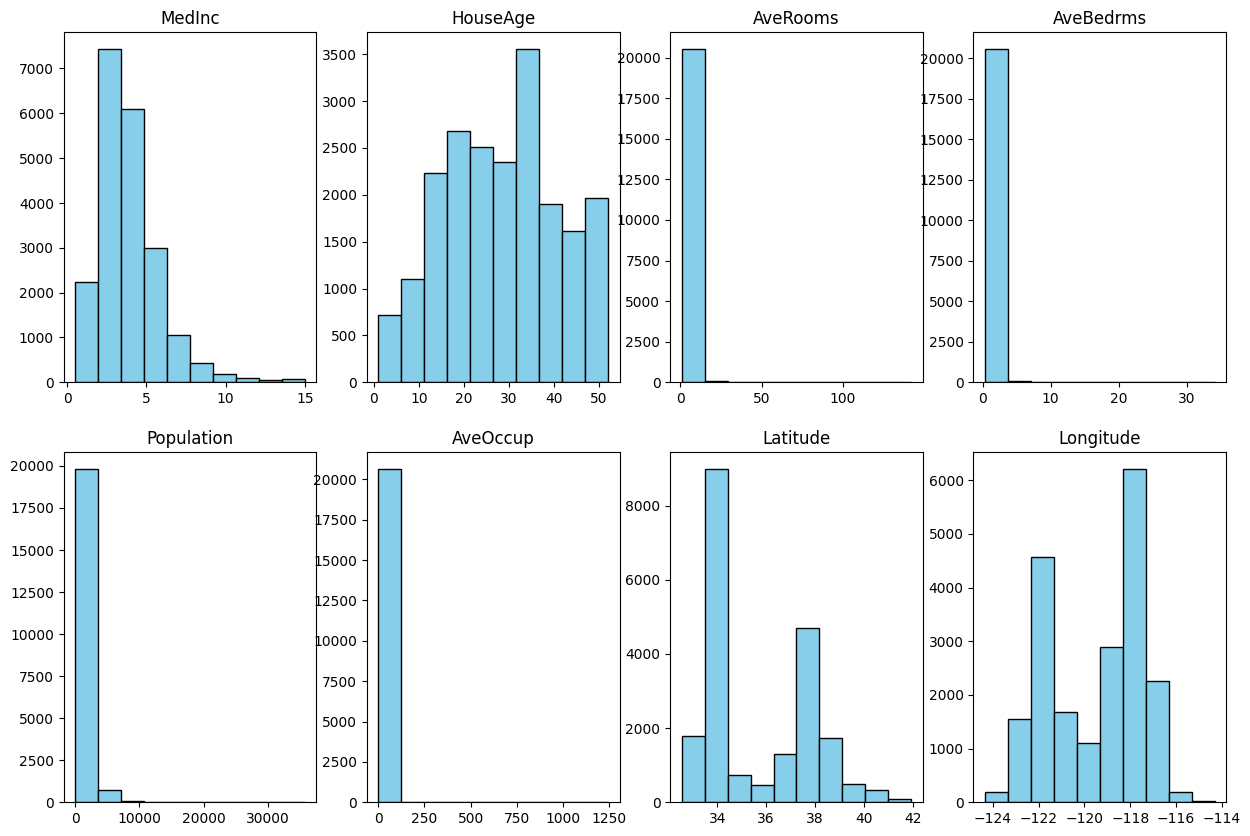

In [5]:
# TODO: let's visualize the distribution of the 8 features
# modify the code below to plot the histogram of each feature

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10)) # 2x4 grid of subplots

for i in range(8):
    axes[i//4, i%4].hist(features[:, i], bins=10, color='skyblue', edgecolor='black')
    axes[i//4, i%4].set_title(f'{dataset.feature_names[i]}')

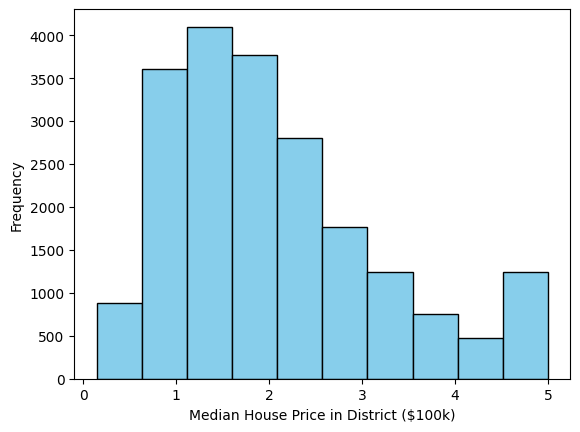

In [6]:
# TODO: let's visualize the distribution of the target labels
# modify the code below to plot the histogram of the target labels

plt.hist(labels, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Median House Price in District ($100k)')
plt.ylabel('Frequency')
plt.show()

# Part B: Linear Regression

In this section, we will use linear regression to predict the target label based on the feature vectors for each sample. We will first use simple linear regression with only one input feature, then we will use multivariable linear regression with the full set of features.

In simple linear regression, the linear model is represented as:

$$ f(x, \theta) = \theta_1 x + \theta_0 $$

The least squares objective function is:

$$ J(\theta) = \frac{1}{N} \sum^N_{i=1} [\theta_1 x_i + \theta_0 - y_i]^2$$

This is a convex function, so we can minimize it by setting the derivative to zero. Solving $ \frac{\partial J}{\partial \theta}=0$ leads to

$$ \theta_1 = \frac{\sum^N_{i=1} (x_i - \bar{x})(y_i - \bar{y})}{\sum^N_{i=1} (x_i - \bar{x})^2}$$

$$ \theta_0 = \bar{y} - \theta_1 \bar{x}$$

where $\bar{x}$ and $\bar{y}$ are the average of $x$ and $y$, respectively.

In [7]:
# TODO: Function for estimating the slope and intercept for simple linear regression
# x: N-length 1D array representing the input features
# y: N-length 1D array representing the target labels
# returns:
#   theta0: intercept
#   theta1: slope
def simple_linear_regression_fit(x, y):

    # use the linear regression formula above to calculate theta1 and theta0
    theta1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    theta0 = np.mean(y) - (theta1 * np.mean(x))

    return theta0, theta1

In [8]:
# define x as the MedInc feature (median income in block group) and y as the median house value
# find the best fit line
feature_index = 0 #index of the MedInc feature
theta0, theta1 = simple_linear_regression_fit(train_x[:, feature_index], train_y)

In [9]:
# calculate the predicted y values for the training set and the test set
# by applying the linear function with slope and intercept

predicted_y_train = theta0 + theta1 * train_x[:, feature_index]
predicted_y_test = theta0 + theta1 * test_x[:, feature_index]

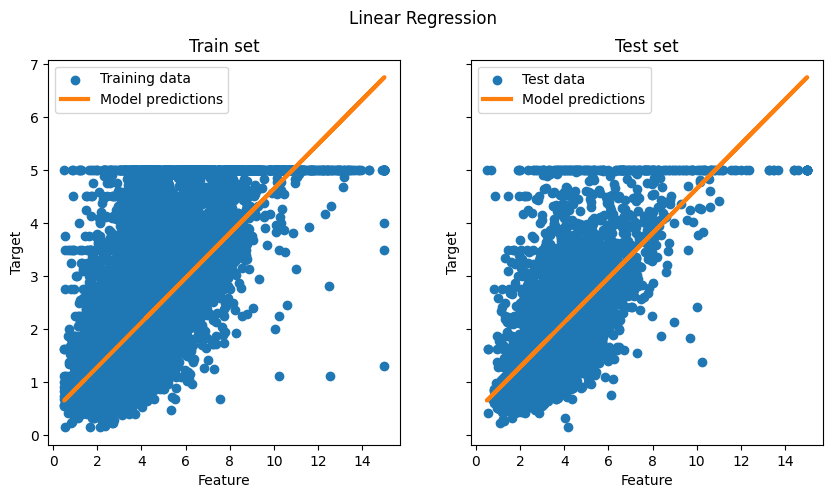

In [10]:
# plot the data together with the best fit line from simple linear regression
# create separate plots for the training data and test data

fig, ax = plt.subplots(ncols=2, figsize = (10, 5), sharex=True, sharey=True)

ax[0].scatter(train_x[:, feature_index], train_y, label="Training data")
ax[0].plot(
    train_x[:, feature_index],
    predicted_y_train,
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(test_x[:, feature_index], test_y, label="Test data")
ax[1].plot(test_x[:, feature_index], predicted_y_test, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

In [11]:
# TODO: Implement linear regression with all 8 input features
# multivariable linear regression can be more complicated, so we will use
# the scikit-learn library to estimate the linear coefficients and intercept
from sklearn.linear_model import LinearRegression

# calculate the predicted y values for the test set
# by applying the linear function with linear coefficients and intercept
model = LinearRegression()
model.fit(train_x, train_y)
predicted_y_test = model.predict(test_x)

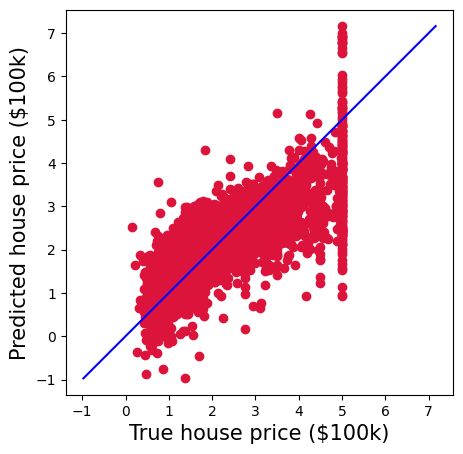

In [12]:
# plot and compare the predicted house price vs the true house price

plt.figure(figsize=(5,5))
plt.scatter(test_y, predicted_y_test, c='crimson')

p1 = max(max(predicted_y_test), max(test_y))
p2 = min(min(predicted_y_test), min(test_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True house price ($100k)', fontsize=15)
plt.ylabel('Predicted house price ($100k)', fontsize=15)
plt.axis('equal')
plt.show()

# Part C: Classification with K-Nearest Neighbors

In the next two sections, we will convert the problem from a regression problem
to a classification problem by binning the target labels into two categories: (i) low price level vs (ii) high price level.

We define values less than or equal to \$200,000 as low price level and values more than \$200,000 as high price level.

Then, we will apply the K-Nearest Neighbor algorithm to classify each sample into those two categories.

In [13]:
# convert the housing prices into binary classification labels (either 0 or 1)
train_y_class = train_y > 2
test_y_class = test_y > 2

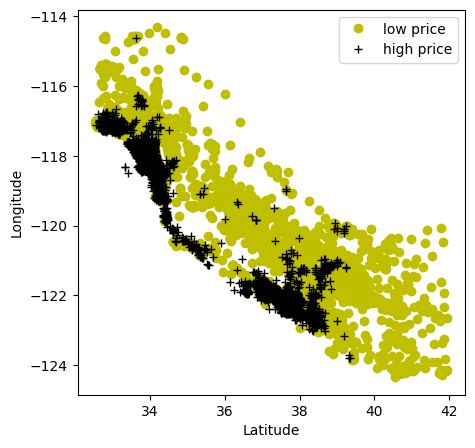

In [14]:
# visualize the training labels with respect to the latitude feature and the longitude feature

plt.figure(figsize=(5,5))
plt.plot(train_x[train_y_class==0, 6], train_x[train_y_class==0, 7], 'yo', label='low price')
plt.plot(train_x[train_y_class==1, 6], train_x[train_y_class==1, 7], 'k+', label='high price')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc="upper right")
plt.show()

In [15]:
# TODO: Function for performing classification using the K-nearest neighbor algorithm
# train_x: NxF 2D array representing the N data samples and F features for each sample in the training set
# train_y_class: N-length 1D array representing the target classes
# test_x: MxF 2D array representing the M data samples and F features for each sample in the test set
# K: number of closest neighbors to use
# returns:
#   predicted_y_test: N-length 1D array representing the predicted classes for the test set
def k_nearest_neighbor(train_x, train_y_class, test_x, K=3):
    predicted_y_test = np.zeros(len(test_x), dtype=bool)
    return predicted_y_test

In [16]:
# call the K-nearest-neighbor function to obtain the predicted class labels
predicted_y_test = k_nearest_neighbor(train_x, train_y_class, test_x, K=3)

In [17]:
# TODO: Function for computing the classification accuracy (percentage of correct predictions)
# predicted_y: N-length 1D array representing the predicted classes (0 or 1)
# test_y: N-length 1D array representing the true classes (0 or 1)
def get_accuracy(predicted_y, true_y):
    return 0

# calculate and print the classification accuracy
print('K-Nearest-Neighbor accuracy is', get_accuracy(predicted_y_test, test_y_class))

K-Nearest-Neighbor accuracy is 0


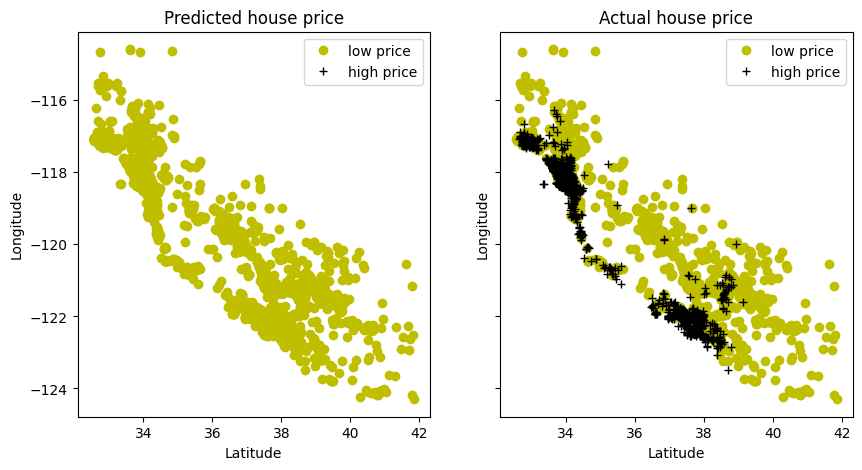

In [18]:
# visualize the target labels with respect to the latitude feature and the longitude feature
# compare the predicted house price vs the actual house price

fig, ax = plt.subplots(ncols=2, figsize = (10, 5), sharex=True, sharey=True)

ax[0].plot(test_x[predicted_y_test==0, 6], test_x[predicted_y_test==0, 7], 'yo', label='low price')
ax[0].plot(test_x[predicted_y_test==1, 6], test_x[predicted_y_test==1, 7], 'k+', label='high price')
ax[0].set(xlabel="Latitude", ylabel="Longitude", title="Predicted house price")
ax[0].legend(loc="upper right")

ax[1].plot(test_x[test_y_class==0, 6], test_x[test_y_class==0, 7], 'yo', label='low price')
ax[1].plot(test_x[test_y_class==1, 6], test_x[test_y_class==1, 7], 'k+', label='high price')
ax[1].set(xlabel="Latitude", ylabel="Longitude", title="Actual house price")
ax[1].legend(loc="upper right")

plt.show()